This is a jupyter ipython notebook for Logistic regression. Logistic regression is a linear classifier to predict the likelihood of some data to be part of a set or class. It is a regression that use the sigmod function to get the probability of membership and use it do determine if the the data must be labeled or not as part of the class.
It is a binary classificator that can be use in the "One vs All" multiclass approach. In this example I only use two features in order to make a surface plot, but it can be expanded to many features.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, preprocessing, cross_validation, metrics

I'm using the Iris Dataset provided from Scykit Learn library, and using just two of the four fields as predictors

In [2]:
iris = datasets.load_iris()
iris.DESCR

'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n    :Missi

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state = 0)

In [5]:
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
lr = LogisticRegression(C=1000.0, random_state = 0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Parameter 'C' is the inverse L2 regularization coefficient, where the smaller is the value, stronger is the regularization L2. This regularization tends to shrinks parameter's weight to 0 if the regularization is to strong

In [7]:
y_pred = lr.predict(X_test_std)
print('Wrong Classified samples: %d' % (np.ravel(y_test) != y_pred).sum())

muestras clasificadas erroneas: 1


In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.02):
    # marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min() -1, X[:,0].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot the samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha = 0.8, c=cmap(idx), marker = markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c = '', alpha = 1.0, linewidth=1, marker='o', s=55, label='test set')
        
        

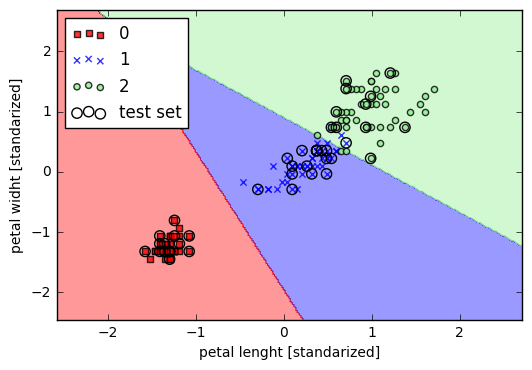

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train.transpose(),y_test.transpose()))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal lenght [standarized]')
plt.ylabel('petal widht [standarized]')
plt.legend(loc='upper left')
plt.show()

## for very large datasets

In [1]:
from sklearn.linear_model import SGDClassifier

In [2]:
lr = SGDClassifier('log')